## Load Libraries

In [14]:
%pip install torch
%pip install torchvision
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 5.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
import torch #core PyTorch library
import torch.nn as nn #neural networks
import torch.optim as optim #optimization
from torchvision import datasets, transforms  #datasets and transforms
from torch.utils.data import DataLoader #Data Loader for data loading fuctions
import scipy.io as sio

## Define Transformations

In [20]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])

## Load The Data

In [ ]:
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) #Train data download
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform) #Test data download

In [27]:
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False)

## Build Architecture

In [ ]:
class cnn_cifar(nn.Module):
    def __init__(self):
        super(cnn_cifar, self).__init__()
        self.cnn1 = nn.Conv2d(3, 6, kernel_size=5) #Input channel is 3 for RGB images
        self.cnn2 = nn.Conv2d(6, 16, kernel_size=5) #Output channel is 16
        self.fc1 = nn.Linear(16 * 24 * 24, 120) # Fully connected layer, input size is 16*24*24 after pooling
        self.fc2 = nn.Linear(120, 84) # Fully connected layer, input size is 120
        self.fc3 = nn.Linear(84, 10)  # Output layer for 10 classes
    
    def forward(self, x):
        x = torch.relu(self.cnn1(x)) #Activation function ReLU
        x = torch.max_pool2d(x, kernel_size=2, stride=2) #Max pooling with kernel size of 2 and stride of 2
        x = torch.relu(self.cnn2(x)) #Activation function ReLU
        x = torch.max_pool2d(x, kernel_size=2, stride=2) #Max pooling with kernel size of 2 and stride of 2
        x = x.view(-1, 16 * 24 * 24) #Flatten the tensor to feed into fully connected layers
        x = torch.relu(self.fc1(x)) #Activation function ReLU
        x = torch.relu(self.fc2(x)) #Activation function ReLU
        x = self.fc3(x) #Output layer without activation function (softmax will be applied later)
        return x
model = cnn_cifar() #Instantiate the model
criterion = nn.CrossEntropyLoss() #Loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001) #Optimizer with learning rate of 0.001
num_epochs = 10 #Number of epochs for training
for epoch in range(num_epochs):
    model.train() #Set the model to training mode
    for images, labels in train_loader:
        optimizer.zero_grad() #Zero the gradients
        outputs = model(images) #Forward pass
        loss = criterion(outputs, labels) #Calculate loss
        loss.backward() #Backward pass
        optimizer.step() #Update weights
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}') #Print loss for each epoch
model.eval() #Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad(): #No need to calculate gradients during evaluation
    for images, labels in test_loader:
        outputs = model(images) #Forward pass
        _, predicted = torch.max(outputs.data, 1) #Get the predicted class
        total += labels.size(0) #Total number of images
        correct += (predicted == labels).sum().item() #Count correct predictions
accuracy = 100 * correct / total #Calculate accuracy
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Epoch [1/10], Loss: 1.0812
Epoch [2/10], Loss: 1.0835
Epoch [3/10], Loss: 0.8544
Epoch [4/10], Loss: 1.0373
Epoch [5/10], Loss: 1.0033
Epoch [6/10], Loss: 1.3131
Epoch [7/10], Loss: 1.2481
Epoch [8/10], Loss: 0.6233
Epoch [9/10], Loss: 0.8981
Epoch [10/10], Loss: 1.3348
Accuracy of the model on the test images: 65.76%


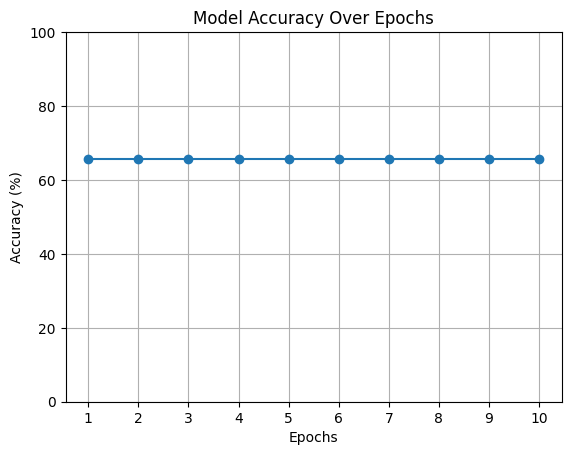

In [30]:
# Plotting the model's accuracy
import matplotlib.pyplot as plt
epochs = list(range(1, num_epochs + 1))
accuracies = [accuracy] * num_epochs  # Assuming accuracy is constant for simplicity
plt.plot(epochs, accuracies, marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xticks(epochs)
plt.ylim(0, 100)
plt.grid()
plt.show()